In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
rf_data = pd.read_csv('model_performance/rf_gridsearch_cv.csv')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013377,0.000834,0.001786,0.000393,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.929825,0.947368,0.973684,0.956140,0.938053,0.949014,0.015169,23
1,0.024755,0.001723,0.001994,0.000035,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.912281,0.929825,0.982456,0.964912,0.973451,0.952585,0.026915,21
2,0.065863,0.014076,0.003320,0.000979,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.964912,0.947368,0.991228,0.964912,0.973451,0.968374,0.014236,1
3,0.116237,0.003856,0.003714,0.000382,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.947368,0.947368,0.973684,0.964912,0.973451,0.961357,0.011851,5
4,0.237855,0.005151,0.005590,0.000468,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.921053,0.938596,0.982456,0.973684,0.973451,0.957848,0.023767,12


In [21]:
rf_data['param_max_depth'] = rf_data['param_max_depth'].fillna('None')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013377,0.000834,0.001786,0.000393,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.929825,0.947368,0.973684,0.956140,0.938053,0.949014,0.015169,23
1,0.024755,0.001723,0.001994,0.000035,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.912281,0.929825,0.982456,0.964912,0.973451,0.952585,0.026915,21
2,0.065863,0.014076,0.003320,0.000979,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.964912,0.947368,0.991228,0.964912,0.973451,0.968374,0.014236,1
3,0.116237,0.003856,0.003714,0.000382,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.947368,0.947368,0.973684,0.964912,0.973451,0.961357,0.011851,5
4,0.237855,0.005151,0.005590,0.000468,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.921053,0.938596,0.982456,0.973684,0.973451,0.957848,0.023767,12


In [22]:
top_score_row = rf_data[rf_data['mean_test_score'] == rf_data['mean_test_score'].max()][['param_n_estimators', 'mean_fit_time', 'mean_test_score', 'param_max_depth']].values.tolist()
top_rf_n_estimators = top_score_row[0][0]
top_rf_mean_fit_time = top_score_row[0][1]
top_rf_mean_fit_time = float("%.4f" % top_rf_mean_fit_time)
top_rf_mean_test_score = top_score_row[0][2]
top_rf_mean_test_score = float("%.4f" % top_rf_mean_test_score)
top_rf_depth = top_score_row[0][3]
top_rf_n_estimators, top_rf_mean_fit_time, top_rf_mean_test_score, top_rf_depth

(20, 0.0659, 0.9684, 5.0)

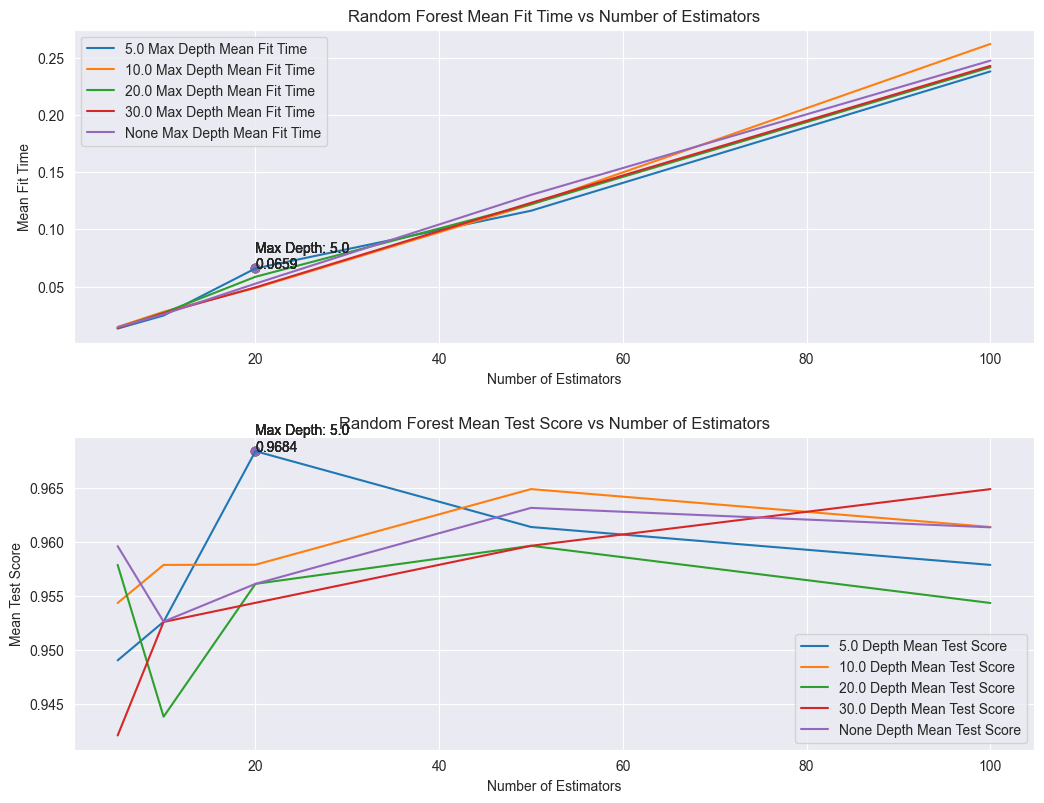

In [23]:
plt.figure(figsize=(12, 9))
depths = rf_data['param_max_depth'].fillna('None').unique()

for depth in depths:
    plt.subplot(2, 1, 1)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
            rf_data[rf_data['param_max_depth']==depth]['mean_fit_time'], label=f'{depth} Max Depth Mean Fit Time')
    plt.title('Random Forest Mean Fit Time vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_rf_n_estimators, top_rf_mean_fit_time)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_fit_time}',
                 xy=(top_rf_n_estimators, top_rf_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
             rf_data[rf_data['param_max_depth']==depth]['mean_test_score'], label=f'{depth} Depth Mean Test Score')
    plt.title('Random Forest Mean Test Score vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_rf_n_estimators, top_rf_mean_test_score)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_test_score}',
                 xy=(top_rf_n_estimators, top_rf_mean_test_score))
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.show()

In [24]:
lr_data = pd.read_csv('model_performance/lr_gridsearch_cv.csv')
lr_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024076,0.010793,0.001641,0.000533,0.0001,NaN,"{'C': 0.0001, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
1,0.003984,0.000633,0.001000,0.000004,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,13
2,0.017752,0.002646,0.001621,0.000511,0.0010,NaN,"{'C': 0.001, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
3,0.010948,0.012061,0.001400,0.000488,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,13
4,0.017772,0.001969,0.001201,0.000401,0.0100,NaN,"{'C': 0.01, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4


In [25]:
lr_data['param_penalty'] = lr_data['param_penalty'].fillna('None')
lr_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024076,0.010793,0.001641,0.000533,0.0001,None,"{'C': 0.0001, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
1,0.003984,0.000633,0.001000,0.000004,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,13
2,0.017752,0.002646,0.001621,0.000511,0.0010,None,"{'C': 0.001, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
3,0.010948,0.012061,0.001400,0.000488,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,13
4,0.017772,0.001969,0.001201,0.000401,0.0100,None,"{'C': 0.01, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
5,0.004343,0.000396,0.001467,0.000582,0.0100,l2,"{'C': 0.01, 'penalty': 'l2'}",0.754386,0.728070,0.754386,0.833333,0.787611,0.771557,0.036207,12
6,0.021463,0.003955,0.002193,0.000746,0.1000,None,"{'C': 0.1, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
7,0.004019,0.000068,0.001175,0.000449,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.912281,0.912281,0.947368,0.947368,0.964602,0.936780,0.020970,11
8,0.017467,0.001486,0.001599,0.000487,1.0000,None,"{'C': 1, 'penalty': None}",0.947368,0.947368,0.947368,0.973684,0.991150,0.961388,0.018037,4
9,0.006964,0.000877,0.001626,0.000593,1.0000,l2,"{'C': 1, 'penalty': 'l2'}",0.956140,0.964912,0.973684,0.956140,0.964602,0.963096,0.006549,3


In [26]:
top_lr_score_row = lr_data[lr_data['mean_test_score'] == lr_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_penalty']].values.tolist()
top_lr_c = top_lr_score_row[0][0]
top_lr_mean_fit_time = top_lr_score_row[0][1]
top_lr_mean_fit_time = float("%.4f" % top_lr_mean_fit_time)
top_lr_mean_test_score = top_lr_score_row[0][2]
top_lr_mean_test_score = float("%.4f" % top_lr_mean_test_score)
top_lr_penalty = top_lr_score_row[0][3]
top_lr_c, top_lr_mean_fit_time, top_lr_mean_test_score, top_lr_penalty

(10.0, 0.0086, 0.9807, 'l2')

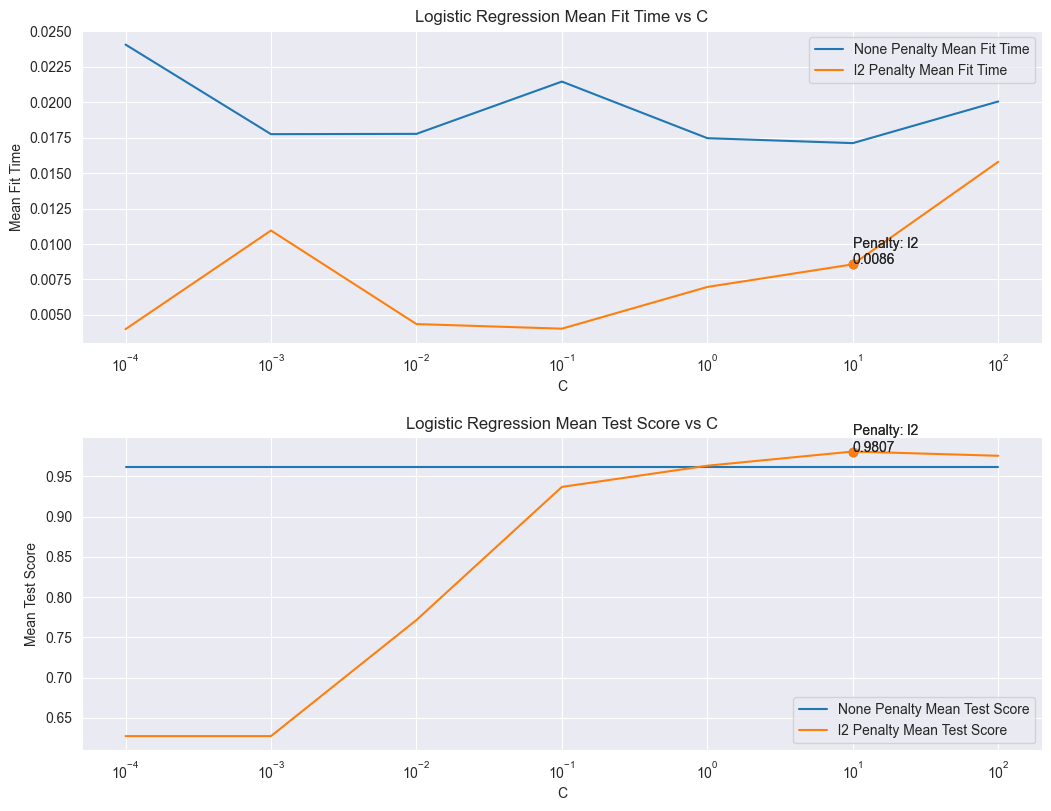

In [27]:
plt.figure(figsize=(12, 9))
penalties = lr_data['param_penalty'].unique()

for penalty in penalties:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
            lr_data[lr_data['param_penalty']==penalty]['mean_fit_time'], label=f'{penalty} Penalty Mean Fit Time')
    plt.title('Logistic Regression Mean Fit Time vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_lr_c, top_lr_mean_fit_time)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_fit_time}', xy=(top_lr_c, top_lr_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
             lr_data[lr_data['param_penalty']==penalty]['mean_test_score'], label=f'{penalty} Penalty Mean Test Score')
    plt.title('Logistic Regression Mean Test Score vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_lr_c, top_lr_mean_test_score)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_test_score}', xy=(top_lr_c, top_lr_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.show()

In [28]:
svm_data = pd.read_csv('model_performance/svm_gridsearch_cv.csv')
svm_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005737,0.003424,0.004886,0.003120,0.1,2,linear,"{'C': 0.1, 'degree': 2, 'kernel': 'linear'}",0.938596,0.929825,0.947368,0.956140,0.964602,0.947306,0.012318,40
1,0.007235,0.004169,0.002351,0.004702,0.1,2,poly,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.964912,0.982456,0.964912,0.964912,0.973451,0.970129,0.006995,30
2,0.008508,0.005414,0.003425,0.004210,0.1,2,rbf,"{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}",0.921053,0.929825,0.973684,0.956140,0.964602,0.949061,0.020261,34
3,0.018051,0.004548,0.007728,0.007044,0.1,2,sigmoid,"{'C': 0.1, 'degree': 2, 'kernel': 'sigmoid'}",0.578947,0.526316,0.438596,0.535088,0.592920,0.534374,0.054135,46
4,0.008400,0.005683,0.001622,0.002098,0.1,3,linear,"{'C': 0.1, 'degree': 3, 'kernel': 'linear'}",0.938596,0.929825,0.947368,0.956140,0.964602,0.947306,0.012318,40


In [29]:
top_svm_score_row = svm_data[svm_data['mean_test_score'] == svm_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_kernel', 'param_degree']].values.tolist()
top_svm_c = top_svm_score_row[0][0]
top_svm_mean_fit_time = top_svm_score_row[0][1]
top_svm_mean_fit_time = float("%.4f" % top_svm_mean_fit_time)
top_svm_mean_test_score = top_svm_score_row[0][2]
top_svm_mean_test_score = float("%.4f" % top_svm_mean_test_score)
top_svm_kernel = top_svm_score_row[0][3]
top_svm_degree = top_svm_score_row[0][4]
top_svm_c, top_svm_mean_fit_time, top_svm_mean_test_score, top_svm_kernel, top_svm_degree

(0.1, 0.002, 0.9789, 'poly', 3)

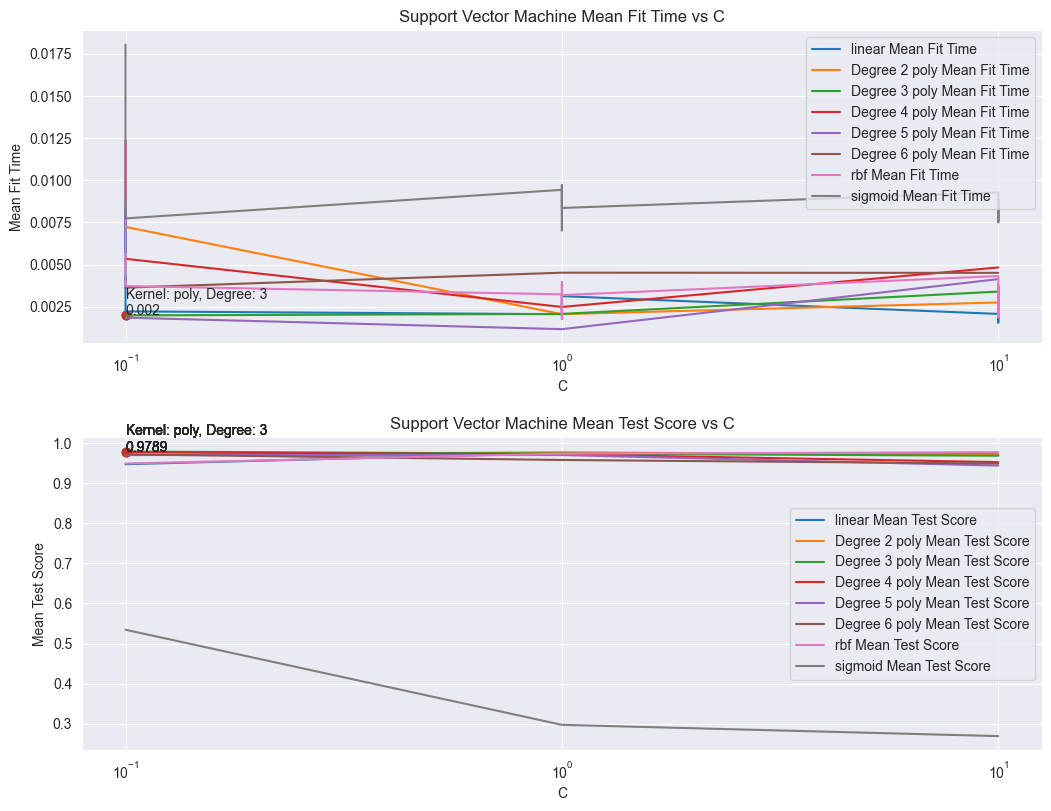

In [30]:
plt.figure(figsize=(12, 9))
kernels = svm_data['param_kernel'].unique()
degrees = svm_data['param_degree'].unique()
for kernel in kernels:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_fit_time'],
                     label=f'Degree {degree} {kernel} Mean Fit Time')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_fit_time}',
                     xy=(top_svm_c, top_svm_mean_fit_time))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_fit_time'],
                 label=f'{kernel} Mean Fit Time')
        plt.title('Support Vector Machine Mean Fit Time vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_fit_time)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_test_score'],
                     label=f'Degree {degree} {kernel} Mean Test Score')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Test Score')
            plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_test_score}',
                         xy=(top_svm_c, top_svm_mean_test_score))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_test_score'],
                 label=f'{kernel} Mean Test Score')
        plt.title('Support Vector Machine Mean Test Score vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Test Score')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_test_score)
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.show()

In [31]:
knn_data = pd.read_csv('model_performance/knn_gridsearch_cv.csv')
knn_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000803,0.000404,0.003360,0.000513,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.947368,0.964912,0.964912,0.947368,0.964602,0.957833,0.008545,27
1,0.000958,0.000571,0.004612,0.000355,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.956140,0.956140,0.982456,0.938596,0.929204,0.952507,0.018220,28
2,0.000837,0.000420,0.003350,0.000496,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.956140,0.956140,0.991228,0.956140,0.955752,0.963080,0.014075,25
3,0.000597,0.000487,0.003032,0.000683,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.956140,0.956140,0.991228,0.956140,0.955752,0.963080,0.014075,25
4,0.000399,0.000488,0.002791,0.000977,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.964912,0.947368,0.991228,0.956140,0.964602,0.964850,0.014679,21


In [32]:
top_knn_score_row = knn_data[knn_data['mean_test_score'] == knn_data['mean_test_score'].max()][['param_n_neighbors', 'mean_fit_time', 'mean_test_score', 'param_weights']].values.tolist()
top_knn_n_neighbors = top_knn_score_row[0][0]
top_knn_mean_fit_time = top_knn_score_row[0][1]
top_knn_mean_fit_time = float("%.4f" % top_knn_mean_fit_time)
top_knn_mean_test_score = top_knn_score_row[0][2]
top_knn_mean_test_score = float("%.4f" % top_knn_mean_test_score)
top_knn_weight = top_knn_score_row[0][3]
top_knn_n_neighbors, top_knn_mean_fit_time, top_knn_mean_test_score, top_knn_weight

(8, 0.0006, 0.9701, 'distance')

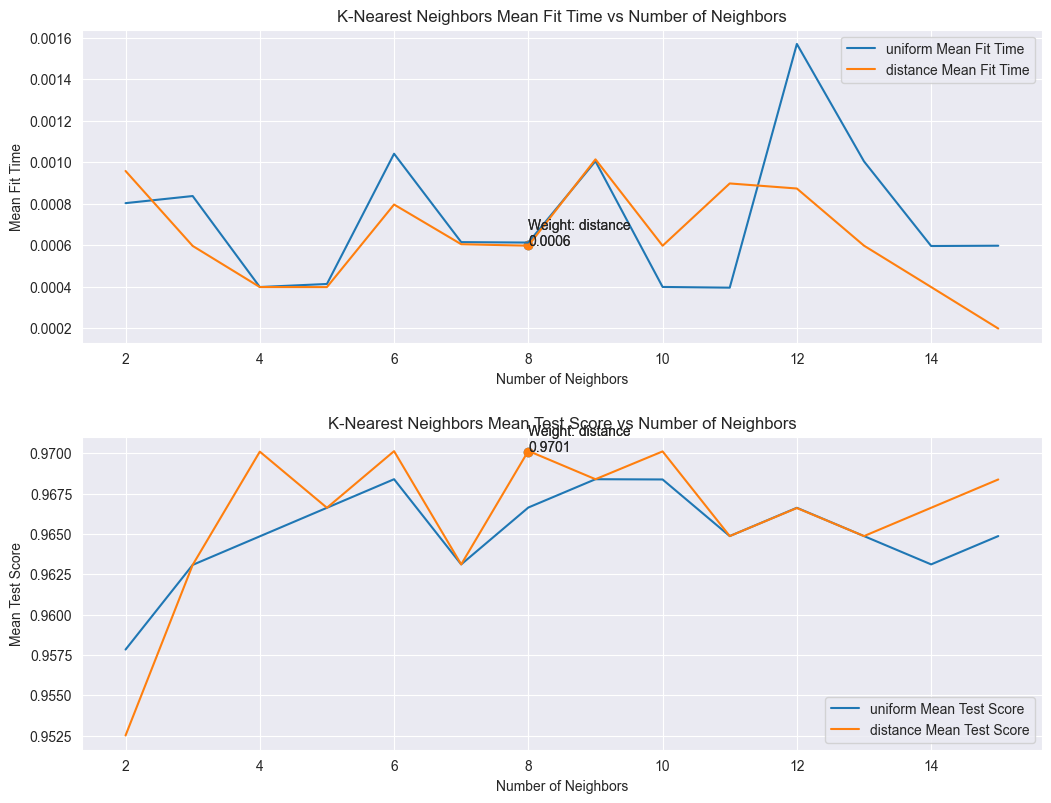

In [33]:
plt.figure(figsize=(12, 9))
weights = knn_data['param_weights'].unique()

for weight in weights:
    plt.subplot(2, 1, 1)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
            knn_data[knn_data['param_weights']==weight]['mean_fit_time'], label=f'{weight} Mean Fit Time')
    plt.title('K-Nearest Neighbors Mean Fit Time vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_fit_time)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_fit_time}', xy=(top_knn_n_neighbors, top_knn_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
             knn_data[knn_data['param_weights']==weight]['mean_test_score'], label=f'{weight} Mean Test Score')
    plt.title('K-Nearest Neighbors Mean Test Score vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_test_score)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_test_score}', xy=(top_knn_n_neighbors, top_knn_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.show()

In [34]:
mlp_data = pd.read_csv('model_performance/mlp_gridsearch_cv.csv')
mlp_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049259,0.022924,0.001792,0.000398,identity,10,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.947368,0.938596,0.947368,0.956140,0.991150,0.956125,0.018371,18
1,0.096492,0.006433,0.001778,0.000391,identity,10,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.859649,0.885965,0.877193,0.938596,0.911504,0.894582,0.027643,42
2,0.110455,0.002374,0.001395,0.000489,identity,10,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.921053,0.912281,0.964912,0.912281,0.946903,0.931486,0.020983,29
3,0.050693,0.011804,0.001798,0.000401,identity,20,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.947368,0.938596,0.947368,0.973684,0.991150,0.959634,0.019668,12
4,0.102135,0.006334,0.001603,0.000507,identity,20,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.850877,0.929825,0.921053,0.929825,0.973451,0.921006,0.039558,35


In [35]:
top_mlp_score_row = mlp_data[mlp_data['mean_test_score'] == mlp_data['mean_test_score'].max()][['param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score', 'param_activation', 'param_solver']].values.tolist()
top_mlp_layer_size = top_mlp_score_row[0][0]
top_mlp_mean_fit_time = top_mlp_score_row[0][1]
top_mlp_mean_fit_time = float("%.4f" % top_mlp_mean_fit_time)
top_mlp_mean_test_score = top_mlp_score_row[0][2]
top_mlp_mean_test_score = float("%.4f" % top_mlp_mean_test_score)
top_mlp_activation = top_mlp_score_row[0][3]
top_mlp_solver = top_mlp_score_row[0][4]
top_mlp_layer_size, top_mlp_mean_fit_time, top_mlp_mean_test_score, top_mlp_activation, top_mlp_solver

(100, 0.5623, 0.9737, 'relu', 'adam')

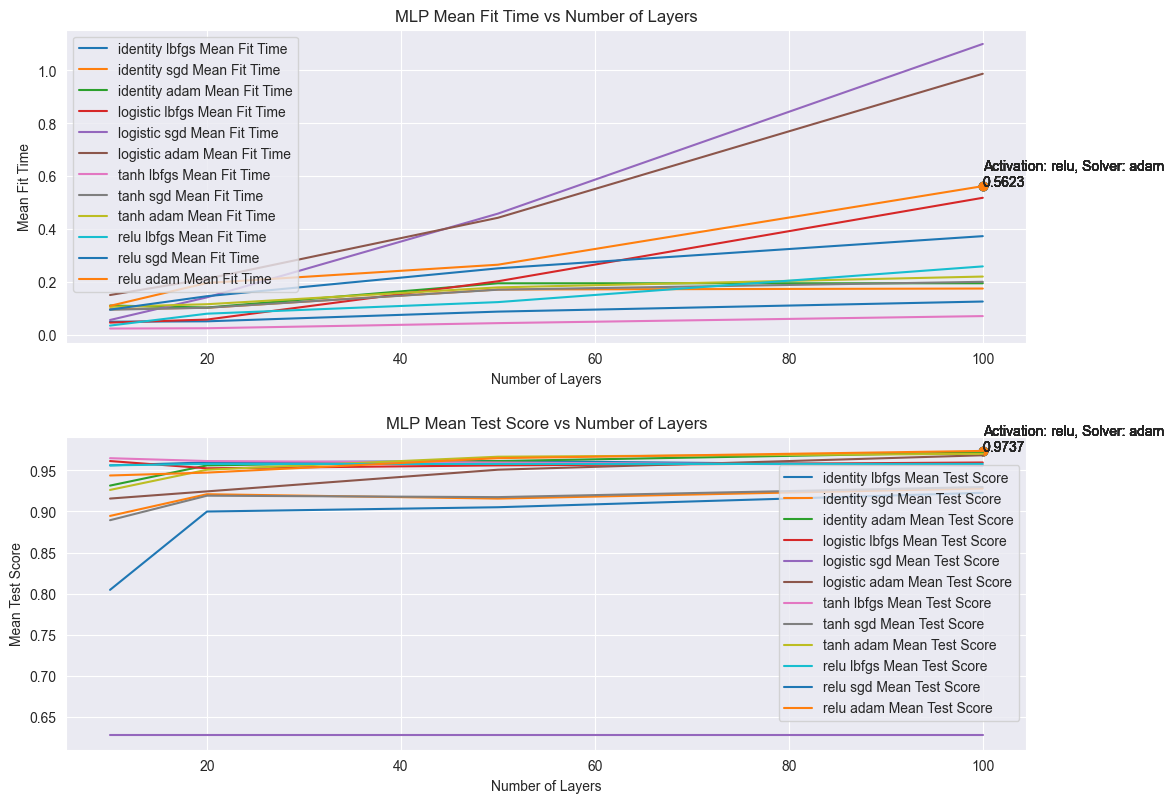

In [36]:
plt.figure(figsize=(12, 9))
activation_functions = mlp_data['param_activation'].unique()
solvers = mlp_data['param_solver'].unique()

for activation in activation_functions:
    for solver in solvers:
        plt.subplot(2, 1, 1)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_fit_time'],
                 label=f'{activation} {solver} Mean Fit Time')
        plt.title('MLP Mean Fit Time vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Fit Time')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_fit_time)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_fit_time}',
                     xy=(top_mlp_layer_size, top_mlp_mean_fit_time))
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_test_score'],
                 label=f'{activation} {solver} Mean Test Score')
        plt.title('MLP Mean Test Score vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Test Score')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_test_score)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_test_score}',
                     xy=(top_mlp_layer_size, top_mlp_mean_test_score))
        plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
plt.show()